# Importing all the libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Data Understanding and Data Loading

In [3]:
boombikes = pd.read_csv('day.csv')

In [4]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
print(f"Total number of columns: {boombikes.shape[0]}")
print(f"Total number of rows: {boombikes.shape[1]}")

Total number of columns: 730
Total number of rows: 16


In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### After understanding the data dictionary I came to the below conclusions:

- `instant` is just an index number which is not essential for our project. We must drop `instant`
- `dteday` is date which can be non essential for our project, because other variables like `yr`, `mnth`, `weekday`, `workingday` pretty much explains everything about the date. So, we must drop `dteday`
- `casual` and `registered` is also non essential for the project. So, we must drop them

###### Hence here is the list of variables need to be dropped
`instant`, `dteday`, `casual`, `registered`

# Preprocessing Steps

Lets start our preprocessing by checking null values

In [8]:
boombikes.isnull().sum().sum()

0

No null values. So far so good!!!

Now, lets check duplicates

In [9]:
boombikes.duplicated().sum()

0

No duplicates as well

#### Let's drop non essential variables

In [10]:
boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
list_of_non_essential_cols = ['instant', 'dteday', 'casual', 'registered']
boombikes.drop(list_of_non_essential_cols, axis=1, inplace=True)
boombikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Now, its time to have a look into categorical variables

In [12]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Here `season`, `yr`, `mnth`, `weekday`, `workingday`, `weathersit` are the only categorical variables so far

#### Lets map all the categorical variables to its actual meaning (looking at data dictionary)
For now just mapping all the categorical columns values in order to do EDA (without considering number of categories present in it)

In [13]:
boombikes['season'] = boombikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombikes['yr'] = boombikes['yr'].map({0:'2018', 1:'2019'})
boombikes['mnth'] = boombikes['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})
boombikes['holiday'] = boombikes['holiday'].map({0: 'no_holiday', 1: 'holiday'})
boombikes['weekday'] = boombikes['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})
boombikes['workingday'] = boombikes['workingday'].map({0: 'No', 1: 'Yes'})
boombikes['weathersit'] = boombikes['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light rain', 4: 'heavy rain'})

In [14]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,no_holiday,sat,No,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,no_holiday,sun,No,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,no_holiday,mon,Yes,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,no_holiday,tue,Yes,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,no_holiday,wed,Yes,clear,9.305237,11.46350,43.6957,12.522300,1600


Looks good!! Now, it will be easy to perform EDA after this categories mapping

# EDA

Now, lets start with EDA.

##### Before starting EDA, lets store all the numerical variables and categorical variables in a list. So that we can use that later wherever necessary 

In [15]:
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] #List of all numerical variables
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] #List of all categorical variables

### Univariate Analysis

In [16]:
# Lets analyse all the numerical variables
boombikes[numerical_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


Here we can analyse:
- Temperature looks like:
    - Min = 2
    - Max = 35
    - Average = 20
- Feeling Temperature looks like:
    - Min = 4
    - Max = 42
    - Average = 24
- Humidity looks like:
    - Min = 0
    - Max = 97
    - Average = 63
- Windspeed looks like:
    - Min = 1
    - Max = 34
    - Average = 13
- Count of the total rental bikes looks like:
    - Min = 22
    - Max = 8714
    - Average = 4508

Also other datas like count, median, standard deviation, etc can be seen in the above description

#### Now, lets visualize the data distribution of all the variables

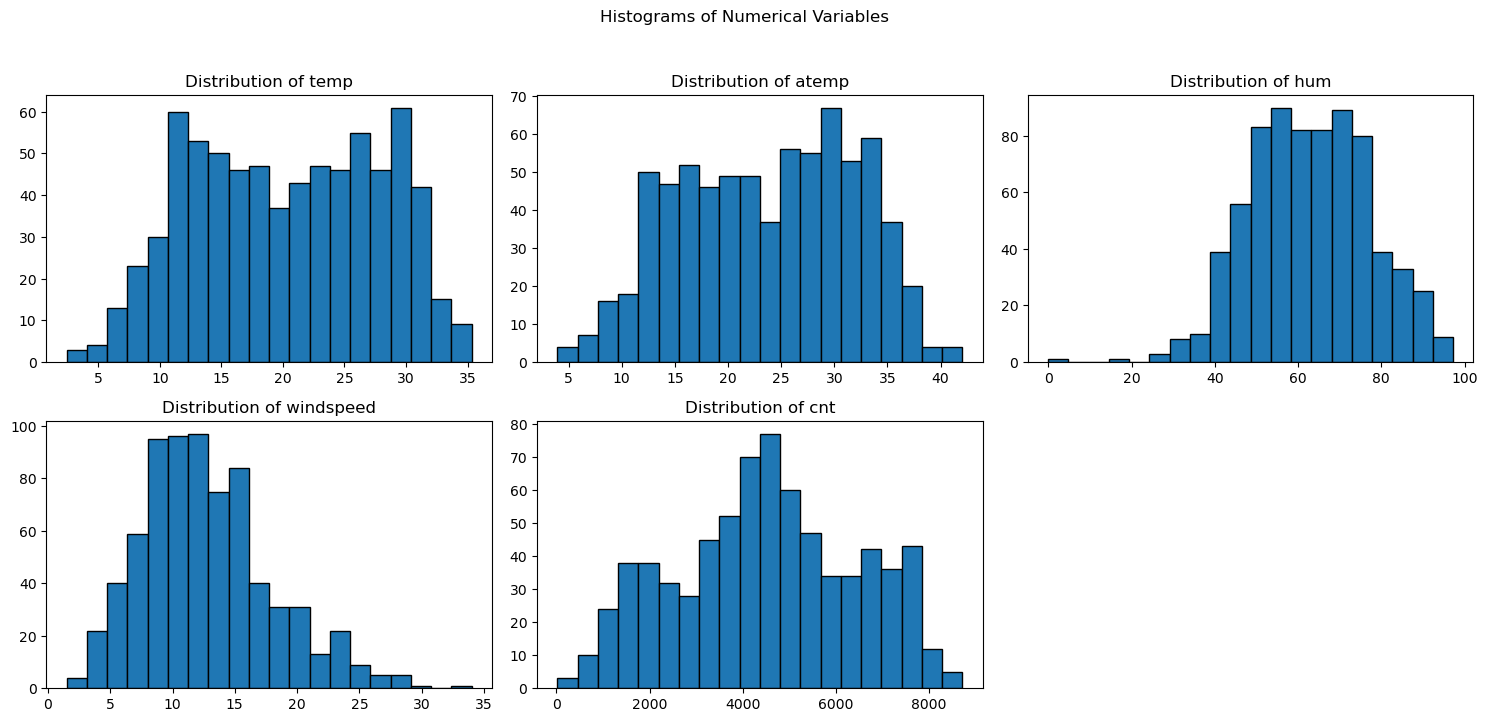

In [17]:
# Numerical variables histogram
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    plt.hist(boombikes[column], bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')

plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()


Here we can see:
- Temperature is in range 2-35. But, high values can be visible somewhere around 10 and also around 30
- Feeling Temperature is in range 4-40. But, high histogram is in the range 12-37
- Most of the humidity data falls in the range 40-80
- Windspeed in the dataset has more values in the range 5-16
- Whereas count of the vehile is pretty much spread in all the ranges but higher count is somewhere around 4000-5000

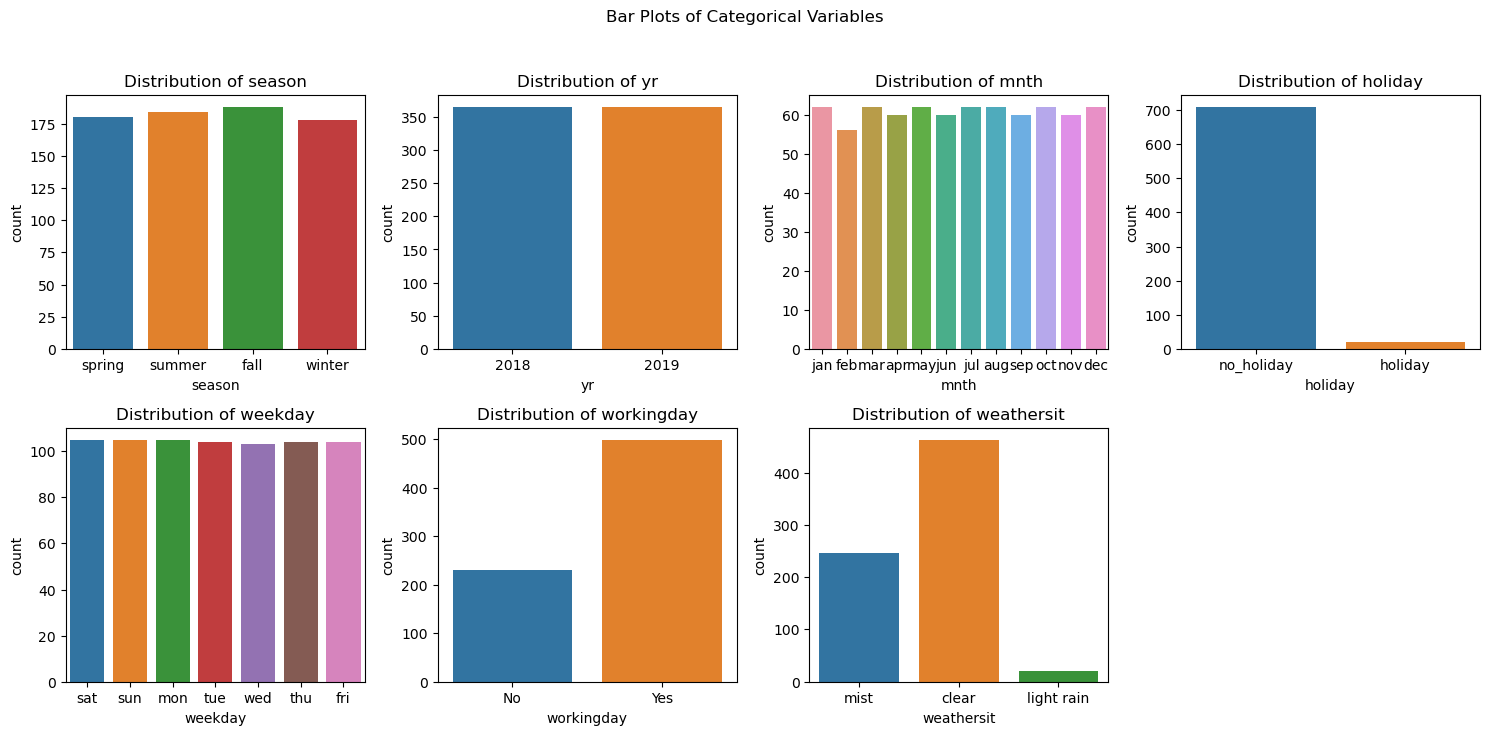

In [18]:
# Categorical varibales countplot
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=boombikes, x=column)
    plt.title(f'Distribution of {column}')

plt.suptitle('Bar Plots of Categorical Variables', y=1.02)
plt.tight_layout()
plt.show()

Looking into these subplots we can come have a pretty much spread of our data
- Overal the spread of data for season is pretty much same but still fall(autumn) have little high counts in the dataset
- Both the year 2018 and 2019 have equal counts
- Looking into month, we can say in Feb there was little less booking
- Non holidays are more in dataset it for ovious reason there are less non holidays
- All the day in a week have almost equally distributed counts in the dataset
- Counts of Working day is more than Non working day; make sense; there are almost 5 working days in a week whereas 2 weekends
- Very less booking on light rain. And there is no booking at all in heavy rain (which was mentioned in data dictionary)

This was just Univariate analysis so, we can't tell much about the actual number of the vehicle booked. Since, we are seeing each variable independently. Now, lets proceed to Bivariate Analysis

##### Now lets compare two variables and have a visualisation

### Bivariate Analysis

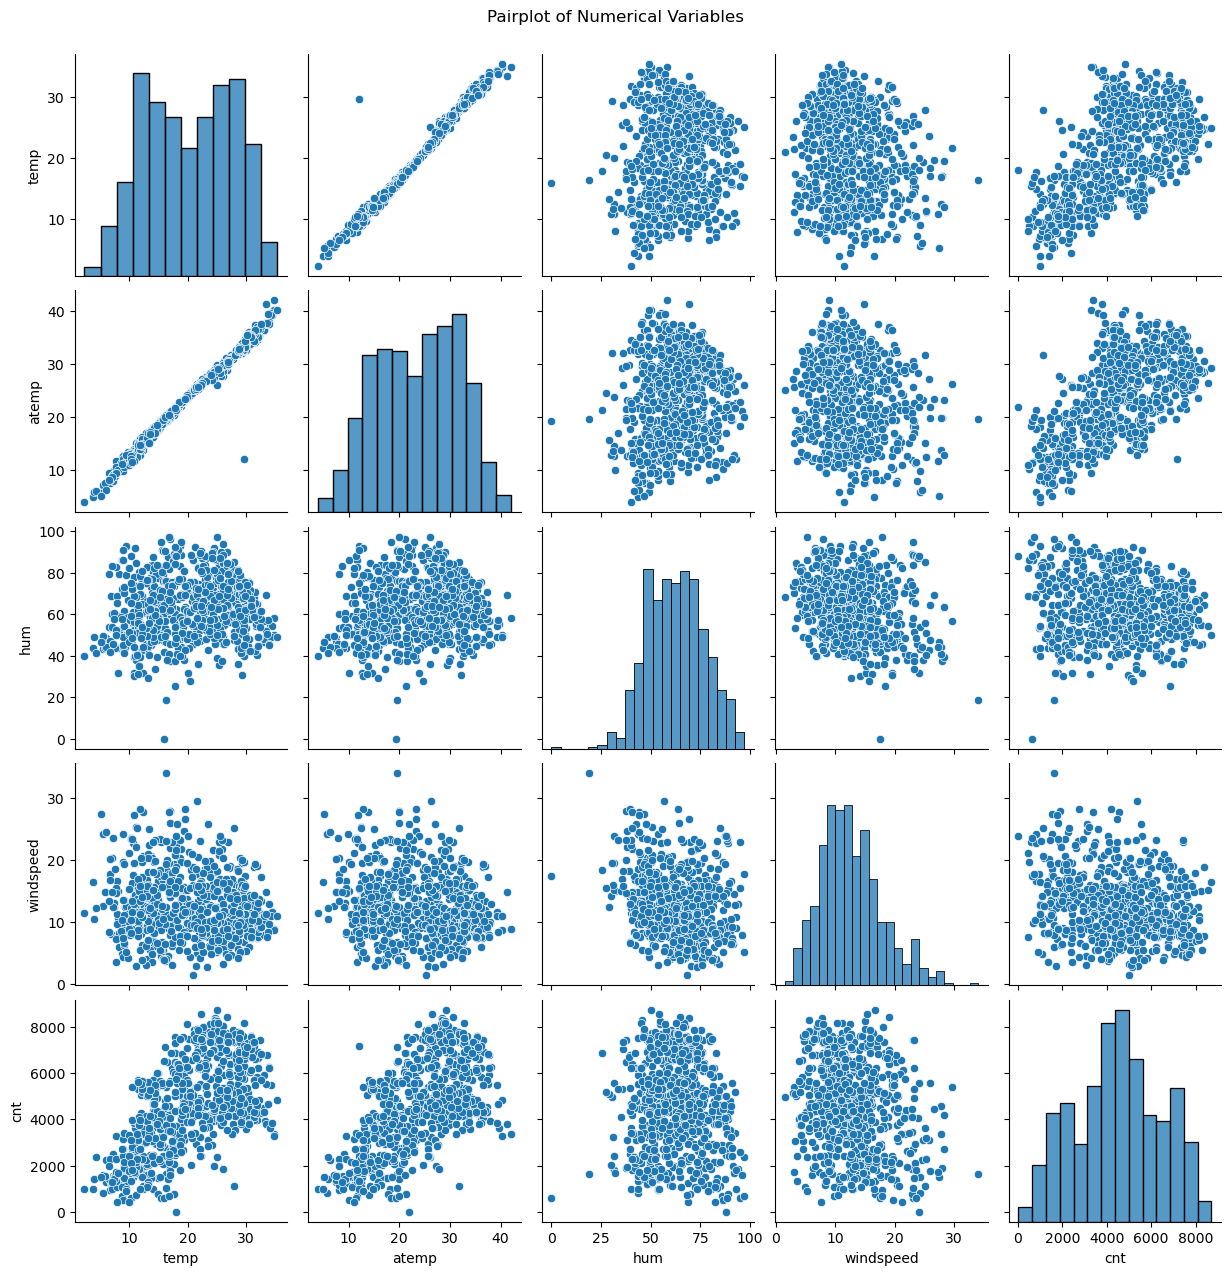

In [19]:
# Numerical variables pairplot
sns.pairplot(boombikes[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

Here we got pretty much information about the numerical variable
- `temp`, `atemp` looks the most linearly correlated to the `cnt`
- And oviously `temp` and `atemp` is gonna be most correlated since, the values are identical, one being actual temperature and other being feeling temperature
- humidity and windspeed doesn't seems to be having linear regression with cnt. But, we can't judge until we calculate R_square.  P_values and VIF. We will look that in further model building section

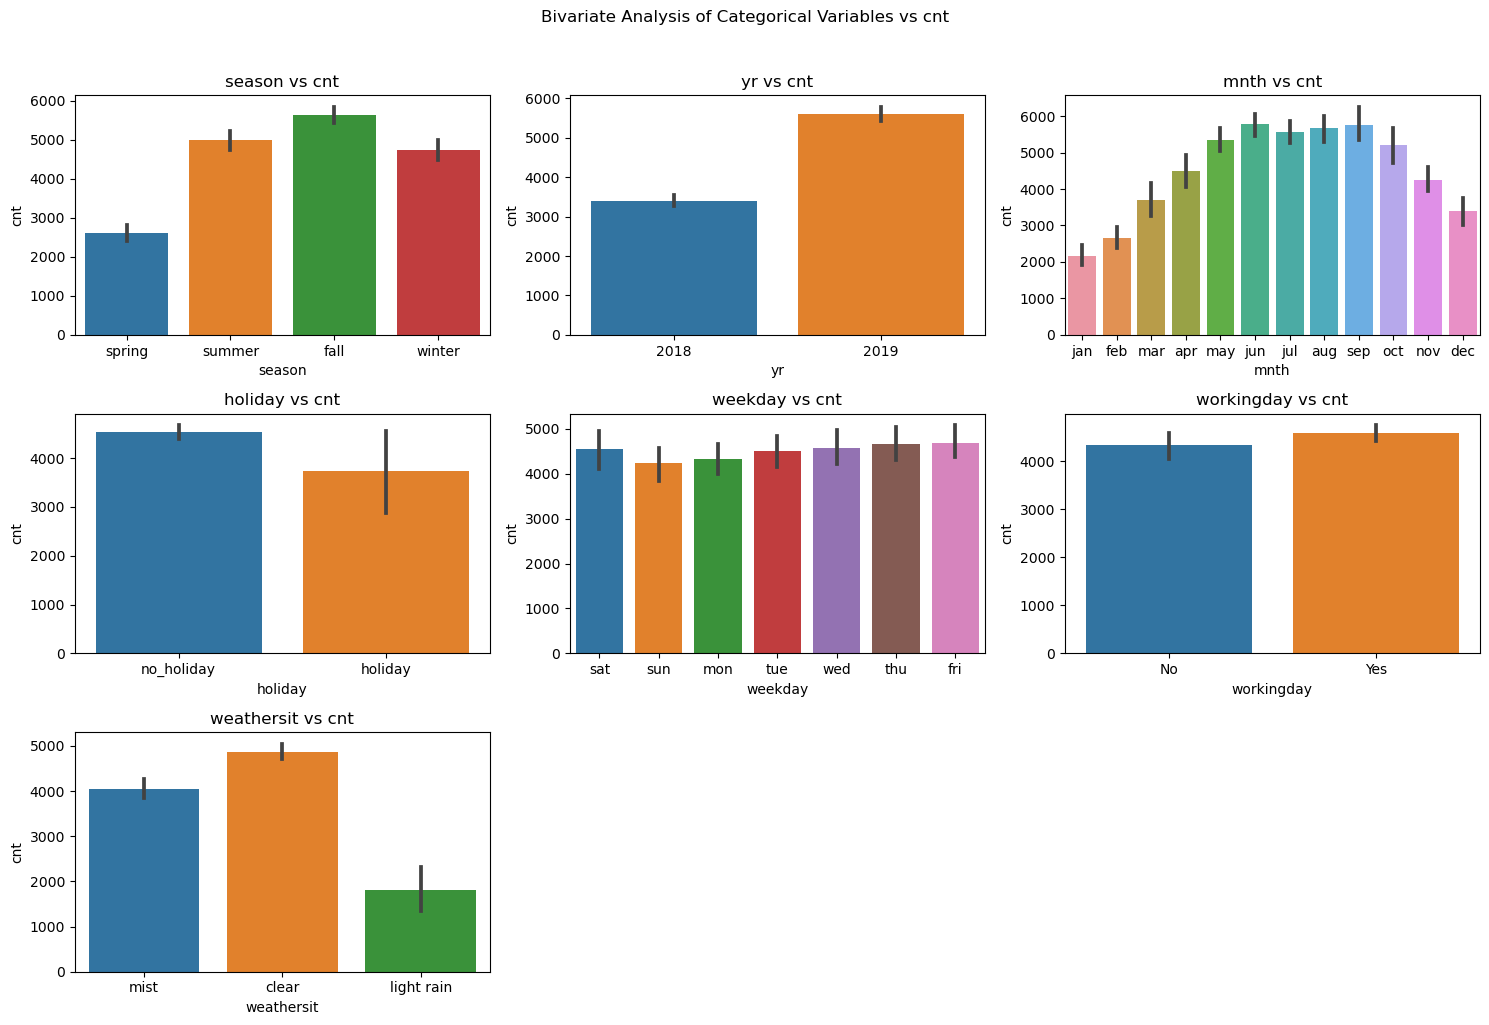

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 3)
    sns.barplot(x=var, y='cnt', data=boombikes, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs cnt')

# Just removing the last empty subplot in the last row to adjust layout
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 1])

plt.suptitle('Bivariate Analysis of Categorical Variables vs cnt', y=1.02)
plt.tight_layout()
plt.show()

We can easily analyse the categorical varibles in following ways:
- Number of booking in fall(autumn) seems to be the most whereas in spring there was the least booking of the bikes
- Now, after evaluating actual count of the booking of the bikes, we can see that in 2019 there was more numbers of booking
- Wow! Jan seems to have least number of booking whereas Jul, Sept seems to have the most number of booking
- On holiday there seems to be less count of booking (maybe because the number of holidays are less in USA?)
- Sun have the least number of booking. Maybe on Sunday many people don't need to go to work or school. And Sat have the highest, maybe because after working/studying hard people seems to roam around on Saturday.
- Number of vehicle was booked in Working days seems to be more than that on non working day
- As we saw in univariate analysis, likewise light rain have the least booking, make sense. People don't wanna ride bike on the rainy day

### Multivariate Analysis

#### Correlation Analysis

<Axes: >

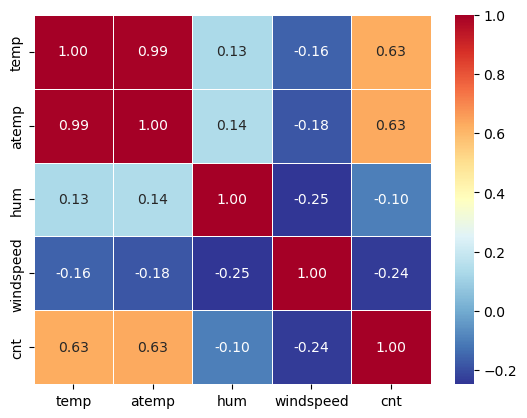

In [21]:
sns.heatmap(boombikes.corr(), annot=True, cmap='RdYlBu_r', fmt=".2f", linewidths=.5)

Here we can see, `cnt` is highly positively correlated to `temp` and `atemp`<br>
But, most negatively correlated to `hum`

# Data Preparation

### Dummy Variables

Now, lets get back to the categorical variables again.<br>
We have already mapped the categorical variabels to its actual meaning (looking into the data dictionary)<br>
And we performed the EDA using those mapped values.<br>
Now, lets check for how many of those categorical variables we need to create dummy variables

In [22]:
for var in categorical_vars:
    print(var,"=>",boombikes[var].value_counts().count())

season => 4
yr => 2
mnth => 12
holiday => 2
weekday => 7
workingday => 2
weathersit => 3


Here, `yr`, `holiday`, `workingday` have only two categories, so except these variables, for all other categorical variables, we must create dummy variables and apply `drop_first` 

But, wait!!! We remember, during EDA, we needed to map the values of the all the categorical variables to its actual values.<br>
So, lets map `yr` and `workingday` to its own original values

In [23]:
boombikes['yr'] = boombikes['yr'].map({'2018':0, '2019':1})
boombikes['holiday'] = boombikes['holiday'].map({'no_holiday': 0, 'holiday': 1})
boombikes['workingday'] = boombikes['workingday'].map({'No':0, 'Yes':0})

In [24]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,0,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,0,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,0,clear,9.305237,11.46350,43.6957,12.522300,1600


Now getting the dummies and droping its first variable

In [25]:
season = pd.get_dummies(boombikes['season'], drop_first = True)
mnth = pd.get_dummies(boombikes['mnth'], drop_first = True)
weekday = pd.get_dummies(boombikes['weekday'], drop_first = True)
weathersit = pd.get_dummies(boombikes['weathersit'], drop_first = True)

# After dropping the first variables of each categories, now concatinating those dummy variables to the original dataframe
boombikes = pd.concat([boombikes, season, mnth, weekday, weathersit], axis = 1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain,mist
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,0,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,0,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,0,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [26]:
boombikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'light rain', 'mist'],
      dtype='object')

After concatinating those dummy variables to the dataframe, lets drop the original categorical variables

In [27]:
boombikes.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'light rain', 'mist'],
      dtype='object')

That's all! We were finally able to finalize the variables of complete dataset<br>
Now, lets proceed to model building. But, before that we must split the dataset into train and tes

# Train-Test Split

In [29]:
df_train, df_test = train_test_split(boombikes, train_size = 0.7, random_state = 100)

In [30]:
df_train.shape #train set shape

(510, 30)

In [31]:
df_test.shape #test set shape

(220, 30)

### Rescaling the features

In [32]:
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


Among all these 30 variables, all the numeric variables should be scaled to fit the transformation<br>
Lets use MinMaxScaler() to scale the numeric variables

But, before scalling lets have a look into the distribution of the numerical variables

In [33]:
df_train[numerical_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.108257,23.500287,63.123710,12.834912,4485.337255
std,7.431626,8.090963,14.153170,5.292031,1950.666077
min,2.424346,3.953480,0.000000,2.834381,22.000000
25%,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,20.277923,24.131150,63.437500,12.083182,4530.000000
75%,26.615847,30.177700,73.250025,15.750879,5973.500000
max,35.328347,42.044800,97.041700,34.000021,8714.000000


The scales are random

In [34]:
scaler = MinMaxScaler()

In [35]:
# Applying scaler() to numerical columns
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

In [36]:
df_train[numerical_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


We were finally able to scale the numeric variables! Now, lets divide train set to X(independents) and y(dependent) sets

# Model Building

### Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

Before directly moving to the model building, first lets use an automatic method to drop few insignificant features (i.e Feature Selection)<br>
Let's start our feature selection with automatic method, i.e. RFE(Recursive Feature Elimination)

## Feature Selection using RFE

In [38]:
# Create a linear regression object
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 20
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 13),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', False, 14),
 ('sun', True, 1),
 ('thu', False, 9),
 ('tue', False, 8),
 ('wed', False, 12),
 ('light rain', True, 1),
 ('mist', True, 1)]

Here, variables with `True` rfe support_ is selected by RFE as significant<br>
Hence,`False` are supposed to be dropped

In [40]:
# Taking the RFE suggested significant variables
col_using = X_train.columns[rfe.support_]
col_using

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jan', 'jul', 'nov', 'sep', 'sun', 'light rain', 'mist'],
      dtype='object')

In [41]:
# These are the non significant variables after the automated feature selection
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'oct',
       'mon', 'sat', 'thu', 'tue', 'wed'],
      dtype='object')

## Manual Feature Selection

### Building model using statsmodel, for the detailed statistics

In [42]:
# Taking RFE selected variables
X_train = X_train[col_using]

Before we start building model, lets just make a generic function for calculating VIF

In [43]:
# Calculate the VIFs
def calculate_VIF(data):
    vif = pd.DataFrame()
    X = data.drop('const', axis=1) # dropping constant in order to check VIF
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

##### Let's start

In [44]:
# Let's build our first LR model
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          2.44e-191
Time:                        03:20:10   Log-Likelihood:                 520.21
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3047      0.035      8.770      0.0

R_square and Adjusted R_square seems to be pretty much good!<br>
But P_values of `nov` seems to be higher than 0.05<br>
These variables seems to be insignificance<br>
But, before dropping those variables lets have a look into VIF

In [45]:
calculate_VIF(X_train)

,Features,VIF
3,hum,29.32
2,temp,16.81
4,windspeed,4.72
5,spring,4.37
7,winter,3.78
6,summer,2.80
14,mist,2.31
0,yr,2.09
8,jan,1.67
10,nov,1.60


Here, `hum`, `temp` have higher VIF than 5<br>

Before dropping variables with high VIF we should have a look into P_values as well<br>
Since, non of the variables have both VIF and P_values higher, we will be dropping variables with high P_values<br>
i.e. Let's drop `nov`

In [46]:
X_train = X_train.drop(['nov'], axis=1)
X_train = sm.add_constant(X_train) # Let's add constant again, because we had to drop constant while checking VIF
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.2
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          4.49e-192
Time:                        03:20:10   Log-Likelihood:                 519.21
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2978      0.034      8.651      0.0

P_values have been improved <br>
But, first lets check VIF

In [47]:
calculate_VIF(X_train)

,Features,VIF
3,hum,29.25
2,temp,16.72
4,windspeed,4.66
5,spring,4.34
7,winter,3.37
6,summer,2.79
13,mist,2.31
0,yr,2.09
8,jan,1.67
9,jul,1.59


Still `hum` and `temp` have higher VIF<br>
Lets drop `hum` first

In [48]:
X_train = X_train.drop('hum', axis=1)
X_train = sm.add_constant(X_train) # Let's add constant again, because we had to drop constant while checking VIF
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.91e-189
Time:                        03:20:10   Log-Likelihood:                 510.17
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     496   BIC:                            -933.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2224      0.030      7.429      0.0

No variables with high P_values

In [49]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train.drop('const', axis=1) # dropping constant in order to check VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,4.62
4,spring,2.78
5,summer,2.25
0,yr,2.07
6,winter,1.82
7,jan,1.61
8,jul,1.59
12,mist,1.57
9,sep,1.34


VIF has also been improved and `temp` have 5.18 VIF. Since, it is an important variable for our data, we won't be dropping it. And in fact its almost 5. So, finally we are able to drop all the insignificant variables

##### Finally we were able to drop all the insignificant variables. Now, all the features have VIF < 5 and P_value <0.05

# Residual analysis

In [50]:
y_train_pred = lm.predict(X_train)

<Axes: ylabel='Density'>

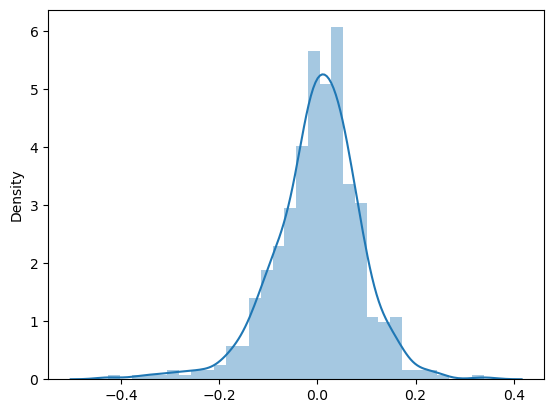

In [51]:
# Computing residuals
res = y_train - y_train_pred
sns.distplot(res)

Distribution of error terms is centered around 0 and its perfectly normal

Now lets plot the relationship between residual and predicted values

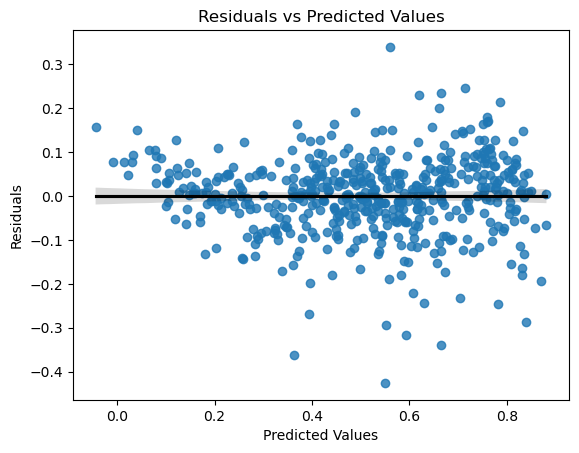

In [52]:
sns.regplot(x=y_train_pred, y=res, line_kws={'color': 'black'}) 
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Model Evaluation

### Applying the scaling on the test sets

In [53]:
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

#### Dividing into X_test and y_test

In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'light rain', 'mist'],
      dtype='object')

In [56]:
X_train.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'jan', 'jul', 'sep', 'sun', 'light rain', 'mist'],
      dtype='object')

In [57]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train.drop('const', axis=1).columns]

# Adding a constant variable
X_test = sm.add_constant(X_test)

In [58]:
# Making predictions
y_pred_test = lm.predict(X_test)

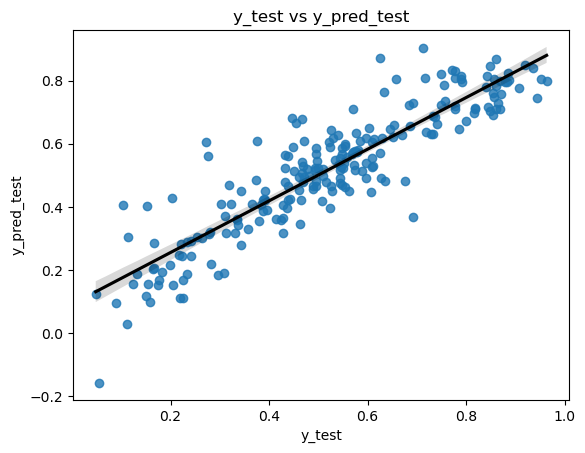

In [59]:
sns.regplot(x=y_test, y=y_pred_test, line_kws={'color': 'black'})
plt.title('y_test vs y_pred_test')
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

Here, clearly we can see the model when tested on the test set, there is linear regression graph between y_test and y_pred_test<br>
Now, lets calculate the R_square value and Adjuested R_square value for both train and test

## Calculating R_square value and Adjusted R_square value

### For Train

In [60]:
y_pred_train = lm.predict(X_train)

In [61]:
# Calculating R-squared for train data
r2_train = r2_score(y_train, y_pred_train)
print(f'R-squared (Train): {r2_train}')

# Calculating Adjusted R-squared for train data using statsmodels
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_intercept).fit()
adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print(f'Adjusted R-squared (Train): {adjusted_r2_train}')

R-squared (Train): 0.842467444221815
Adjusted R-squared (Train): 0.8380119779977855


Amazing!! Both `R_square` and `Adjusted R_square` is having a good score

### For Test

In [62]:
y_pred_test = lm.predict(X_test)

In [63]:
# Calculating R-squared for test data
r2_test = r2_score(y_test, y_pred_test)
print(f'R-squared (Test): {r2_test}')

# Calculating Adjusted R-squared for test data using statsmodels
X_test_with_intercept = sm.add_constant(X_test)
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Adjusted R-squared (Test): {adjusted_r2_test}')

R-squared (Test): 0.8049406101312646
Adjusted R-squared (Test): 0.7916194810670583


Nice! Even in the test set, the `R_square` and `Adjusted R_square` is having a good score which proves the model to be really good model!